Predicting Heart Disease Logistic Regression

In [147]:
#import pandas
import pandas as pd
# load 'dataset'
heart = pd.read_csv('heart1.csv')


In [148]:
heart.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1


# Correlation Matrix

1. Correlation between the independent and dependent
2. Correlation between the independent - multi-collinearity
multicollinearity  is a problem that you identify when all columns have similar impact.
How to solve a multi

# Multi-collinearity

multicollinearity  is a problem that you identify when all columns have similar impact.
How to solve a multi collinearity problem
1. remove one of the columns
2. combine the columns
3. apply principal component analysis


In [149]:
df1=heart.corr()
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,-0.430696


In [150]:

#df2=heart[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','']].corr()
#df2

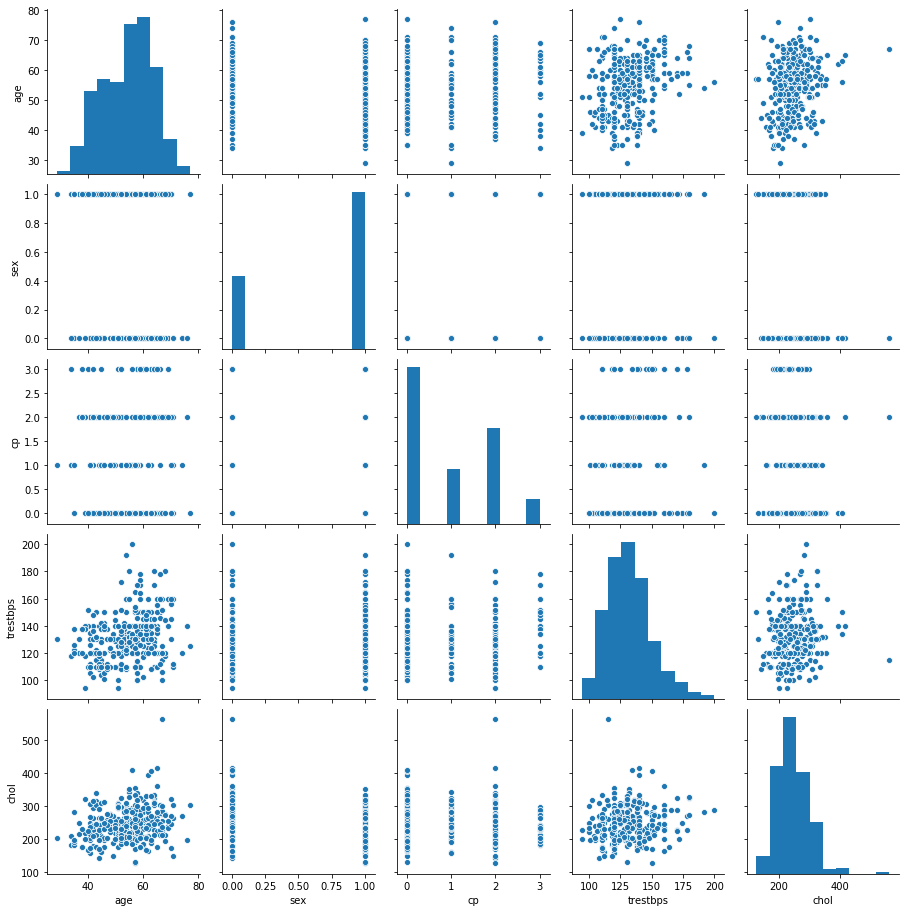

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
dfheart = heart.iloc[:,:5]
sns.pairplot(dfheart)




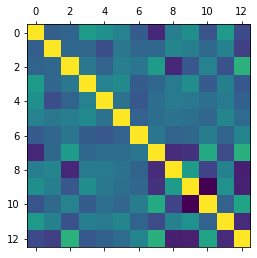

In [152]:
import matplotlib.pyplot as plt

plt.matshow(heart.corr())
plt.show()

In [153]:
#heart.corr

Selecting Feature
Here, you need to divide the given columns into two types of variables dependent
(or target variable) and independent variable(or feature variables).

In [154]:
X = pd.DataFrame(heart.iloc[:,:-1])
y = pd.DataFrame(heart.iloc[:,-1])

In [155]:
X.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0


In [156]:
y.head(2)

,target
0,1
1,1


Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [157]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score

#from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [158]:
X_train.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
173,58,1,2,132,224,0,0,173,0,3.2,2,2
261,52,1,0,112,230,0,1,160,0,0.0,2,1


Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

Model Development and Prediction
First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [159]:
y_train.head(3)

,target
173,0
261,0
37,1


In [160]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Evaluation using Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [161]:
y_test.head(1)

,target
225,0


In [162]:
y_pred=logmodel.predict(X_test)

In [163]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[23, 10],
       [ 4, 39]], dtype=int64)

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.

Visualizing Confusion Matrix using Heatmap
Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.

In [164]:
 #import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


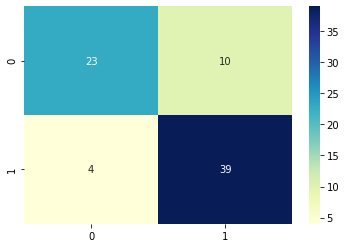

In [165]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

Confusion Matrix Evaluation Metrics
Let's evaluate the model using model evaluation metrics such as accuracy

In [166]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8157894736842105


In [167]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [168]:
y_test.head(2)

,target
225,0
152,1


In [169]:
#y_test.columns=['TradeDate','TradeTime']

In [170]:
type(y_test)

pandas.core.frame.DataFrame

In [171]:
y_test.head()

,target
225,0
152,1
228,0
201,0
52,1


In [172]:
#ytest_ypred= pd.DataFrame({'srno':y_test.index, 'y_test':y_test.values})

In [173]:
y_test_pred['y_pred'] = y_pred
print(y_test)

     target
225       0
152       1
228       0
201       0
52        1
..      ...
46        1
160       1
232       0
181       0
27        1

[76 rows x 1 columns]


In [174]:
y_test_pred


,target,y_pred
225,0,0
152,1,1
228,0,1
201,0,0
52,1,0
...,...,...
46,1,1
160,1,1
232,0,0
181,0,0


In [175]:
y_test

,target
225,0
152,1
228,0
201,0
52,1
...,...
46,1
160,1
232,0
181,0


In [176]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [179]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8157894736842105
Precision: 0.7959183673469388
Recall: 0.9069767441860465


# Metrics

A classification rate of 80%, considered as good accuracy.





Precision:
Out of the total observations: how often is the model correct when it predicts as Diabetes?
Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 76% of the time.

Recall (also called True Positive Rate or Sensitivity):
from all the actual instances of Diabetes, how often it correctly predicts Diabetes    
Recall: If there are Actual patients who have diabetes in the test set and your Logistic Regression model can identify it 58% of the time.

# ROC CURVE

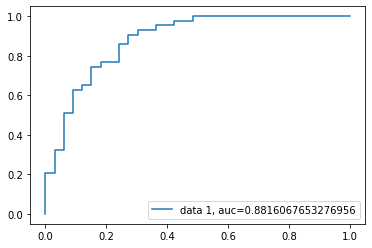

In [181]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
#y_pred_proba = logreg.predict_proba(X_test,1)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [182]:
y_pred_proba

array([0.07527   , 0.88980501, 0.89078216, 0.03543466, 0.20179779,
       0.53915306, 0.09444029, 0.18606524, 0.01153226, 0.00754145,
       0.88347908, 0.91720075, 0.05708413, 0.80050085, 0.9548495 ,
       0.62737471, 0.13763457, 0.72484701, 0.01334545, 0.89976357,
       0.7726262 , 0.40307877, 0.13732266, 0.10432665, 0.82802173,
       0.6859122 , 0.29160456, 0.44472474, 0.97440171, 0.62204972,
       0.58791207, 0.02941223, 0.95255043, 0.85699024, 0.89856857,
       0.6543181 , 0.06899446, 0.78518042, 0.0756161 , 0.13436928,
       0.5729571 , 0.77217091, 0.40026137, 0.05485792, 0.45283116,
       0.6942272 , 0.75283727, 0.75268327, 0.07641372, 0.86506323,
       0.80909094, 0.58921895, 0.96085775, 0.69672001, 0.9928604 ,
       0.15732034, 0.93722091, 0.92346233, 0.76285527, 0.93857661,
       0.68972808, 0.98231623, 0.91904264, 0.89632916, 0.75530813,
       0.64758581, 0.80260392, 0.29821032, 0.65763589, 0.54755008,
       0.59759032, 0.92942832, 0.82409645, 0.07602133, 0.12813

# Analysing the ROC Curve

AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.